# Compare simulated and observed data for B2 site
 ---
**Description:** this script will compare simulated and observed data for the meteorological station B2 located in Val Mazia (Italy)

**Author:** Elisa Bortoli (elisa.bortoli@eurac.edu)

**Credits:** Giacomo Bertoldi (giacomo.bertoldi@eurac.edu)

**Date:** 2019-07-23

**Version:** 1.0

**Usage:** simple run

**Python version:** 3.6.8

**Requirements:** Python modules: os, glob, sys, pandas, numpy, matplotlib

 **Notes:** 
- The test setup can be found at:
https://github.com/geotopmodel/geotop/tree/v3.0/tests/1D/Matsch_B2_Ref_007


- The measured data used can be found at:
https://github.com/EURAC-Ecohydro/MonaLisa/tree/master/geotop/1D/Matsch_B2_Optim_001/obs

## Import the necessary modules

In [1]:
import os 
import glob 
import sys
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import datetime as datetime

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
// avoid output into scrollable frames

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
#%matplotlib notebook

## Set working paths of the simulation

In [4]:
B2_path = r"/home/elisa/paper_GEOtop/tests/Matsch_B2_Ref_007"

# Simulations
sim_data = B2_path + r"/data_simulated"
sim_path = sim_data + r"/sim_6"

# sim_path = "/media/elisa/Maxtor/EURAC/trainee_Matsch_B2_Ref_007/"
#sim_path = "/media/elisa/Maxtor/EURAC/B2_BeG_017"

# Observations
obs_data = B2_path + r"/data_observed"
obs_path = obs_data + r"/obs-bottazzi-tagliato"

# Comparison
results_comparison = B2_path + r"/comparison_results"

In [5]:
# # Effective start and end
# start_ref = datetime.datetime(2009,10,2,0,0)
# end_ref  = datetime.datetime(2015,12,31,23,0)
# period_ref = pd.date_range(start_ref, end_ref, freq='H')
# print("start = ", start_ref)
# print("end   = ", end_ref)
# print("len(period_data) = ", len(period_ref))
# print(period_ref[0])
# print(period_ref[-1])

## Load data
### Observed data 
### (a) obs*.txt


In [6]:
# Select only obs*.txt files
os.chdir(obs_path)
unsorted_obs_files = glob.glob("obs*.txt")

# Sort in alphabetical order files
obs_files = sorted(unsorted_obs_files, key=str.lower)

# Imports files into pandas dataframe
observed_data = []
for j,trace in enumerate(obs_files):
    filepath = os.path.join(obs_path, trace)
    traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date12.DDMMYYYYhhmm.'], # Date format is correct
                                index_col = ['Date12.DDMMYYYYhhmm.'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    observed_data.append(traces_series)

In [7]:
# View all the columns headers
# list(traces_series)
traces_series.head()

,rainfall_amount,wind_speed,wind_from_direction,relative_humidity,air_temperature,surface_downwelling_shortwave_flux,soil_moisture_content_50,soil_moisture_content_200,latent_heat_flux_in_air,sensible_heat_flux_in_air
Date12.DDMMYYYYhhmm.,,,,,,,,,,
2009-10-02 01:00:00,0.0,3.53,7.33,0.3793,13.58,0.0,NaN,NaN,NaN,NaN
2009-10-02 02:00:00,0.0,3.91,6.99,0.3763,13.01,0.0,NaN,NaN,NaN,NaN
2009-10-02 03:00:00,0.0,3.49,11.28,0.4046,12.36,0.0,NaN,NaN,NaN,NaN
2009-10-02 04:00:00,0.0,3.82,95.46,0.4168,12.07,0.0,NaN,NaN,NaN,NaN
2009-10-02 05:00:00,0.0,3.67,6.48,0.4256,11.61,0.0,NaN,NaN,NaN,NaN


In [8]:
# Effective start and end
print("Practice")
print("start = ", traces_series.index.min())
print("end   = ", traces_series.index.max())
print("len(period_data) = ", len(traces_series))
print(" ------------------------------------------- ")
print("Theory")
start = datetime.datetime(2009,10,2,2,0)
end  = datetime.datetime(2016,1,1,0,0)
period_theory = pd.date_range(start, end, freq='H')
print("start = ", start)
print("end   = ", end)
print("len(period_data) = ", len(period_theory))
print(" ------------------------------------------- ")
print("Missing data = ", len(period_theory)-len(traces_series))
gaps = period_theory[~period_theory.isin(traces_series.index)]
print(gaps)

Practice
start =  2009-10-02 01:00:00
end   =  2015-12-31 23:00:00
len(period_data) =  54761
 ------------------------------------------- 
Theory
start =  2009-10-02 02:00:00
end   =  2016-01-01 00:00:00
len(period_data) =  54767
 ------------------------------------------- 
Missing data =  6
DatetimeIndex(['2010-03-28 02:00:00', '2011-03-27 02:00:00',
               '2012-03-25 02:00:00', '2013-03-31 02:00:00',
               '2014-03-30 02:00:00', '2015-03-29 02:00:00',
               '2016-01-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)


In [9]:
# Fill datetime gaps with NaN
obs_correct = traces_series.reindex(period_theory)
print("len(obs_correct) = ", len(obs_correct))
print(" ------------------------------------------- ")
print("Missing data = ", len(period_theory)-len(obs_correct))

observed_data = []
for j,trace in enumerate(obs_files):
    observed_data.append(obs_correct)

len(obs_correct) =  54767
 ------------------------------------------- 
Missing data =  0


In [10]:
obs_correct.head()

,rainfall_amount,wind_speed,wind_from_direction,relative_humidity,air_temperature,surface_downwelling_shortwave_flux,soil_moisture_content_50,soil_moisture_content_200,latent_heat_flux_in_air,sensible_heat_flux_in_air
2009-10-02 02:00:00,0.0,3.91,6.99,0.3763,13.01,0.0,NaN,NaN,NaN,NaN
2009-10-02 03:00:00,0.0,3.49,11.28,0.4046,12.36,0.0,NaN,NaN,NaN,NaN
2009-10-02 04:00:00,0.0,3.82,95.46,0.4168,12.07,0.0,NaN,NaN,NaN,NaN
2009-10-02 05:00:00,0.0,3.67,6.48,0.4256,11.61,0.0,NaN,NaN,NaN,NaN
2009-10-02 06:00:00,0.0,3.25,98.09,0.4128,11.13,0.0,NaN,NaN,NaN,NaN


#### New datetime

In [11]:
# Shift all obs timeseries of one day
start_new = datetime.datetime(2009,10,1,0,0)
end_new  = datetime.datetime(2015,12,30,22,0)

period_new = pd.date_range(start_new, end_new, freq='H')
print("start = ", start_new)
print("end   = ", end_new)
print("(len(period_new_obs) = ", len(period_new))
print(" ------------------------------------------- ")
obs_correct.index = period_new
obs_correct.head()

start =  2009-10-01 00:00:00
end   =  2015-12-30 22:00:00
(len(period_new_obs) =  54767
 ------------------------------------------- 


,rainfall_amount,wind_speed,wind_from_direction,relative_humidity,air_temperature,surface_downwelling_shortwave_flux,soil_moisture_content_50,soil_moisture_content_200,latent_heat_flux_in_air,sensible_heat_flux_in_air
2009-10-01 00:00:00,0.0,3.91,6.99,0.3763,13.01,0.0,NaN,NaN,NaN,NaN
2009-10-01 01:00:00,0.0,3.49,11.28,0.4046,12.36,0.0,NaN,NaN,NaN,NaN
2009-10-01 02:00:00,0.0,3.82,95.46,0.4168,12.07,0.0,NaN,NaN,NaN,NaN
2009-10-01 03:00:00,0.0,3.67,6.48,0.4256,11.61,0.0,NaN,NaN,NaN,NaN
2009-10-01 04:00:00,0.0,3.25,98.09,0.4128,11.13,0.0,NaN,NaN,NaN,NaN


In [12]:
# Select a data subset 
obs_correct = obs_correct.loc[(obs_correct.index >= '2014-04-10 00:00:00') 
                          & (obs_correct.index <= '2015-12-31 23:00:00')]
print(len(obs_correct))
obs_correct.head()

15119


,rainfall_amount,wind_speed,wind_from_direction,relative_humidity,air_temperature,surface_downwelling_shortwave_flux,soil_moisture_content_50,soil_moisture_content_200,latent_heat_flux_in_air,sensible_heat_flux_in_air
2014-04-10 00:00:00,0.0,NaN,0.0,0.5285,7.67,0.0,0.36900,0.40800,17.680000,-30.975000
2014-04-10 01:00:00,0.0,NaN,0.0,0.5134,7.55,0.0,0.36925,0.40800,13.880000,-34.655000
2014-04-10 02:00:00,0.0,NaN,0.0,0.5072,7.59,0.0,0.36900,0.40800,14.325000,-40.670000
2014-04-10 03:00:00,0.0,NaN,0.0,0.4916,7.99,0.0,0.36950,0.40775,17.165000,-33.160000
2014-04-10 04:00:00,0.0,NaN,0.0,0.5040,7.69,0.0,0.36925,0.40800,11.200256,-21.732637


### Simulated data 
### (a) point.txt

In [13]:
# Read in list of files
point_path = sim_path + r"/output-tabs/"

# Select only point0*.txt files
os.chdir(point_path)
unsorted_point_files = glob.glob("point0*.txt")

# Sort in alphabetical order files
point_files = sorted(unsorted_point_files, key=str.lower)

# Imports files into pandas dataframe
point_data = []
for j,trace in enumerate(point_files):
    filepath = os.path.join(point_path, trace)
    traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
                                index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    point_data.append(traces_series)

In [14]:
# View all the columns headers
# list(traces_series)

In [15]:
# len(list(traces_series))
# np.full(shape=77, fill_value=-9999, dtype=np.int)

In [16]:
# Effective start and end
print("Practice")
print("start = ", traces_series.index.min())
print("end   = ", traces_series.index.max())
print("len(period_data) = ", len(traces_series))
print(" ------------------------------------------- ")
print("Theory")
start = datetime.datetime(2009,10,2,1,0)
end  = datetime.datetime(2015,12,31,23,0)
period_theory = pd.date_range(start, end, freq='H')
print("start = ", start)
print("end   = ", end)
print("len(period_data) = ", len(period_theory))
print(" ------------------------------------------- ")
print("Missing data = ", len(period_theory)-len(traces_series))
gaps = period_theory[~period_theory.isin(traces_series.index)]
print(gaps)

Practice
start =  2009-10-02 01:00:00
end   =  2015-12-31 23:00:00
len(period_data) =  54767
 ------------------------------------------- 
Theory
start =  2009-10-02 01:00:00
end   =  2015-12-31 23:00:00
len(period_data) =  54767
 ------------------------------------------- 
Missing data =  0
DatetimeIndex([], dtype='datetime64[ns]', freq='H')


In [17]:
# Select a data subset
traces_series = traces_series.loc[(traces_series.index >= '2014-04-10 00:00:00') 
                          & (traces_series.index <= '2015-12-31 23:00:00')]
print(len(traces_series))
traces_series.head()

point_data = []
for j,trace in enumerate(point_files):
    point_data.append(traces_series)

15144


### (b) thetaliq.txt

In [18]:
# Read in list of files
path = sim_path + r"/output-tabs/"

# Select only thetaliq*.txt files
os.chdir(path)
unsorted_thetaliq_files = glob.glob("thetaliq*.txt")

# Sort in alphabetical order files
thetaliq_files = sorted(unsorted_thetaliq_files, key=str.lower)

# Imports files into pandas dataframe
theta_data = []
for j,trace in enumerate(thetaliq_files):
    filepath = os.path.join(path, trace)
    traces_series_theta = pd.read_csv(filepath,
                                parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
                                index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    theta_data.append(traces_series_theta)

In [19]:
# View all the columns headers
# list(traces_series)

In [20]:
# Effective start and end
print("Practice")
print("start = ", traces_series_theta.index.min())
print("end   = ", traces_series_theta.index.max())
print("len(period_data) = ", len(traces_series_theta))
print(" ------------------------------------------- ")
print("Theory")
start = datetime.datetime(2009,10,2,0,0)
end  = datetime.datetime(2015,12,31,23,0)
period_theory = pd.date_range(start, end, freq='H')
print("start = ", start)
print("end   = ", end)
print("len(period_data) = ", len(period_theory))
print(" ------------------------------------------- ")
print("Missing data = ", len(period_theory)-len(traces_series))
gaps = period_theory[~period_theory.isin(traces_series_theta.index)]
print(gaps)

Practice
start =  2009-10-02 00:00:00
end   =  2015-12-31 23:00:00
len(period_data) =  54768
 ------------------------------------------- 
Theory
start =  2009-10-02 00:00:00
end   =  2015-12-31 23:00:00
len(period_data) =  54768
 ------------------------------------------- 
Missing data =  39624
DatetimeIndex([], dtype='datetime64[ns]', freq='H')


In [21]:
# Select a data subset
traces_series_theta = traces_series_theta.loc[(traces_series_theta.index >= '2014-04-10 00:00:00') 
                          & (traces_series_theta.index <= '2015-12-31 23:00:00')]
print(len(traces_series_theta))
traces_series_theta.head()

theta_data = []
for j,trace in enumerate(thetaliq_files):
    theta_data.append(traces_series_theta)

15144


## Plot Simulated vs Observed data - hourly

In [22]:
# for i in range(0,len(obs_files)):
#     obsdata = obs_correct
#     pointdata = point_data[i]
#     thetadata = theta_data[i]

#     pointdata['LEtot'] = pointdata['Canopy_fraction[-]']*(pointdata['LEg_veg[W/m2]']+pointdata['LEv[W/m2]']) 
#     + (1-pointdata['Canopy_fraction[-]'])*pointdata['LEg_unveg[W/m2]'] 
    
#     pointdata['Htot'] = pointdata['Canopy_fraction[-]']*(pointdata['Hg_veg[W/m2]']+pointdata['Hv[W/m2]']) 
#     + (1-pointdata['Canopy_fraction[-]'])*pointdata['Hg_unveg[W/m2]']

#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index,(pointdata['Prain_over_canopy[mm]']+pointdata['Psnow_over_canopy[mm]']).cumsum())
#     plt.plot(obsdata.index, obsdata['rainfall_amount'].cumsum(), color='blue', linestyle='--')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("height [mm]")
#     plt.title("Cumulated Rainfall")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "Pcum.png"))
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['Wind_speed[m/s]'], color = 'blue')
#     plt.plot(obsdata.index, obsdata['wind_speed'], color = 'orange', linestyle='--')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("wind speed [m/s]")
#     plt.title("Wind speed")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "Ws.png"))
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['Wind_direction[deg]'], color = 'blue')
#     plt.plot(obsdata.index, obsdata['wind_from_direction'], color = 'green', linestyle='--')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("direction [°]")
#     plt.title("Wind direction")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "Wd.png"))
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['Relative_Humidity[-]'], color = 'orange')
#     plt.plot(obsdata.index, obsdata['relative_humidity'], color = 'red', linestyle='--')
#     plt.xticks(rotation=45)
#     plt.ylim(-1.5,1.5)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("RH [-]")
#     plt.title("Relative Humidity")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "RH.png"))              
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['Tair[C]'], color = 'black')
#     plt.plot(obsdata.index, obsdata['air_temperature'], linestyle='--')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("Temperature [°C]")
#     plt.title("Air temperature")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "Tair.png"))             
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['SWin[W/m2]'], color = 'black')
#     plt.plot(obsdata.index, obsdata['surface_downwelling_shortwave_flux'],color = 'magenta', linestyle='--')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("Flux [W/m2]")
#     plt.title("Surface Downwelling Shortwave Flux")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "SWin.png"))              
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(thetadata.index, thetadata['50.000000 '], color = 'red')
#     plt.plot(obsdata.index, obsdata['soil_moisture_content_50'], color = 'blue', linestyle='--')
#     plt.legend(['Simulated 5 cm', 'Observed 5 cm']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("SMC [-]")
#     plt.title("Soil Moisture Content")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "SWC_5cm.png"))             
#  # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(thetadata.index, thetadata['200.000000 '], color = 'red')
#     plt.plot(obsdata.index, obsdata['soil_moisture_content_200'], color = 'blue', linestyle='--')
#     plt.legend(['Simulated 20 cm', 'Observed 20 cm']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("SMC [-]")
#     plt.title("Soil Moisture Content")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "SWC_20cm.png"))                              
# # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['LEtot'], color = 'orange')
#     plt.plot(obsdata.index, obsdata['latent_heat_flux_in_air'], color='red', linestyle='--')
#     plt.legend(['Simulated','Observed']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("Fluxes [W/m2]")
#     plt.title("LE Fluxes in air")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "LEtot.png"))                              
# # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['Htot'], color = 'blue')
#     plt.plot(obsdata.index, obsdata['sensible_heat_flux_in_air'], color = 'green', linestyle='--')
#     plt.legend(['Simulated','Observed']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("Fluxes [W/m2]")
#     plt.title("H Fluxes in air")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "Htot.png"))                             
    
# #plt.close('all');
# plt.show();
#     # LE: energy absorbed by or released from a substance during a phase change 
#     # H : energy required to change the temperature of a substance with NO phase change

In [23]:
# for i in range(0,len(obs_files)):
#     obsdata = obs_correct
#     pointdata = point_data[i]
#     thetadata = theta_data[i]

#     pointdata['LEtot'] = pointdata['Canopy_fraction[-]']*(pointdata['LEg_veg[W/m2]']+pointdata['LEv[W/m2]']) 
#     + (1-pointdata['Canopy_fraction[-]'])*pointdata['LEg_unveg[W/m2]'] 
    
#     pointdata['Htot'] = pointdata['Canopy_fraction[-]']*(pointdata['Hg_veg[W/m2]']+pointdata['Hv[W/m2]']) 
#     + (1-pointdata['Canopy_fraction[-]'])*pointdata['Hg_unveg[W/m2]']

#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index,(pointdata['Prain_over_canopy[mm]']+pointdata['Psnow_over_canopy[mm]']).cumsum())
#     plt.plot(obsdata.index, obsdata['rainfall_amount'].cumsum(), color='blue', linestyle='--')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("height [mm]")
#     plt.title("Cumulated Rainfall")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "Pcum.png"))
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['Wind_speed[m/s]'], color = 'blue')
#     plt.plot(obsdata.index, obsdata['wind_speed'], color = 'orange', linestyle='--')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("wind speed [m/s]")
#     plt.title("Wind speed")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "Ws.png"))
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['Wind_direction[deg]'], color = 'blue')
#     plt.plot(obsdata.index, obsdata['wind_from_direction'], color = 'green', linestyle='--')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("direction [°]")
#     plt.title("Wind direction")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "Wd.png"))
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['Relative_Humidity[-]'], color = 'orange')
#     plt.plot(obsdata.index, obsdata['relative_humidity'], color = 'red', linestyle='--')
#     plt.xticks(rotation=45)
#     plt.ylim(-1.5,1.5)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("RH [-]")
#     plt.title("Relative Humidity")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "RH.png"))              
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['Tair[C]'], color = 'black')
#     plt.plot(obsdata.index, obsdata['air_temperature'], linestyle='--')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("Temperature [°C]")
#     plt.title("Air temperature")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "Tair.png"))             
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['SWin[W/m2]'], color = 'black')
#     plt.plot(obsdata.index, obsdata['surface_downwelling_shortwave_flux'],color = 'magenta', linestyle='--')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated','Observed']) 
#     plt.ylabel("Flux [W/m2]")
#     plt.title("Surface Downwelling Shortwave Flux")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "SWin.png"))              
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(thetadata.index, thetadata['40.000000 '], color = 'red')
#     plt.plot(thetadata.index, (thetadata['40.000000 ']+thetadata['60.000000 '])/2, color = 'orange')
#     plt.plot(thetadata.index, thetadata['60.000000 '], color = 'green')
#     plt.plot(obsdata.index, obsdata['soil_moisture_content_50'], color = 'blue', linestyle='--')
#     plt.legend(['Simulated 4 cm','Simulated 5 cm', 'Simulated 6 cm', 'Observed 5 cm']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("SMC [-]")
#     plt.title("Soil Moisture Content")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "SWC_5cm.png"))             
#  # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(thetadata.index, thetadata['175.000000 '], color = 'red')
#     plt.plot(thetadata.index, (thetadata['175.000000 ']+thetadata['225.000000 '])/2, color = 'orange')
#     plt.plot(thetadata.index, thetadata['225.000000 '], color = 'green')
#     plt.plot(obsdata.index, obsdata['soil_moisture_content_200'], color = 'blue', linestyle='--')
#     plt.legend(['Simulated 17.5 cm','Simulated 20 cm', 'Simulated 22.5 cm', 'Observed 20 cm']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("SMC [-]")
#     plt.title("Soil Moisture Content")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "SWC_20cm.png"))                              
# # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['LEtot'], color = 'orange')
#     plt.plot(obsdata.index, obsdata['latent_heat_flux_in_air'], color='red', linestyle='--')
#     plt.legend(['Simulated','Observed']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("Fluxes [W/m2]")
#     plt.title("LE Fluxes in air")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "LEtot.png"))                              
# # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata.index, pointdata['Htot'], color = 'blue')
#     plt.plot(obsdata.index, obsdata['sensible_heat_flux_in_air'], color = 'green', linestyle='--')
#     plt.legend(['Simulated','Observed']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("Fluxes [W/m2]")
#     plt.title("H Fluxes in air")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "Htot.png"))                             
    
# #plt.close('all');
# plt.show();
#     # LE: energy absorbed by or released from a substance during a phase change 
#     # H : energy required to change the temperature of a substance with NO phase change

## Plot Simulated vs Observed data - daily

In [24]:
start_d = datetime.datetime(2014,4,10,0,0)
end_d  = datetime.datetime(2015,12,31,22,0)

period_d = pd.date_range(start_d, end_d, freq='D')
print(len(period_d))
period_d

631


DatetimeIndex(['2014-04-10', '2014-04-11', '2014-04-12', '2014-04-13',
               '2014-04-14', '2014-04-15', '2014-04-16', '2014-04-17',
               '2014-04-18', '2014-04-19',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=631, freq='D')

In [25]:
start_d_obs = datetime.datetime(2014,4,10,0,0)
end_d_obs  = datetime.datetime(2015,12,30,22,0)

period_d_obd = pd.date_range(start_d_obs, end_d_obs, freq='D')
print(len(period_d_obd))
period_d_obd

630


DatetimeIndex(['2014-04-10', '2014-04-11', '2014-04-12', '2014-04-13',
               '2014-04-14', '2014-04-15', '2014-04-16', '2014-04-17',
               '2014-04-18', '2014-04-19',
               ...
               '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
               '2015-12-25', '2015-12-26', '2015-12-27', '2015-12-28',
               '2015-12-29', '2015-12-30'],
              dtype='datetime64[ns]', length=630, freq='D')

In [26]:
# for i in range(0,len(obs_files)):
#     obsdata = obs_correct
#     thetadata = theta_data[i]
       
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(period_d, thetadata['50.000000 '].resample('D').mean(), color = 'red')
#     plt.plot(period_d_obd, obsdata['soil_moisture_content_50'].resample('D').mean(), color = 'blue', linestyle='--')
#     plt.legend(['Simulated 5 cm', 'Observed 5 cm']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("SMC [-]")
#     plt.title("Soil Moisture Content")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
#  # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(period_d, thetadata['200.000000 '].resample('D').mean(), color = 'red')
#     plt.plot(period_d_obd, obsdata['soil_moisture_content_200'].resample('D').mean(), color = 'blue', linestyle='--')
#     plt.legend(['Simulated 20 cm', 'Observed 20 cm']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("SMC [-]")
#     plt.title("Soil Moisture Content")
#     plt.xlim(obsdata.index.min(), obsdata.index.max())
#     plt.tight_layout()
# # -----------------------------------------------------------------------------------------------                           
    
# #plt.close('all');
# plt.show();
#     # LE: energy absorbed by or released from a substance during a phase change 
#     # H : energy required to change the temperature of a substance with NO phase change

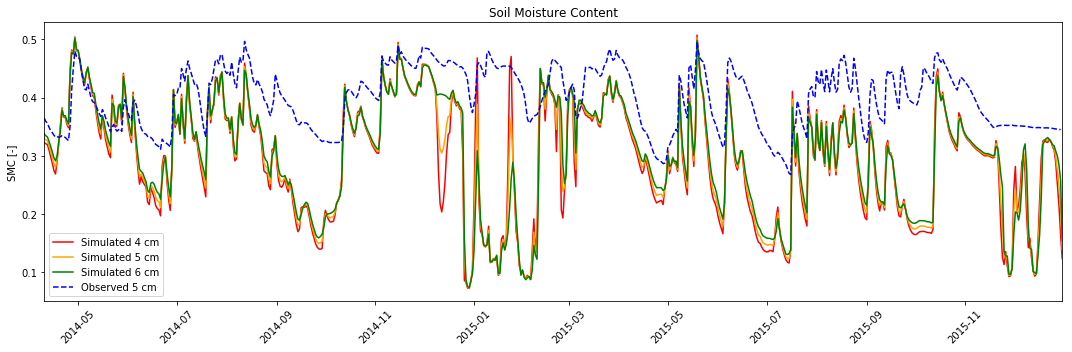

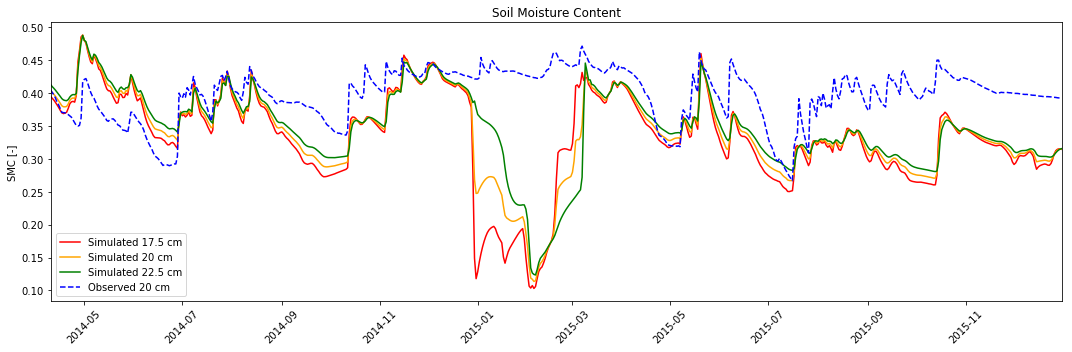

In [27]:
for i in range(0,len(obs_files)):
    obsdata = obs_correct
    thetadata = theta_data[i]
       
    # -----------------------------------------------------------------------------------------------
    plt.figure(figsize = (15,5))
    plt.plot(period_d, thetadata['40.000000 '].resample('D').mean(), color = 'red')
    plt.plot(period_d, (thetadata['40.000000 '].resample('D').mean()+thetadata['60.000000 '].resample('D').mean())/2, color = 'orange')
    plt.plot(period_d, thetadata['60.000000 '].resample('D').mean(), color = 'green')
    plt.plot(period_d_obd, obsdata['soil_moisture_content_50'].resample('D').mean(), color = 'blue', linestyle='--')
    plt.legend(['Simulated 4 cm','Simulated 5 cm', 'Simulated 6 cm', 'Observed 5 cm']) 
    plt.xticks(rotation=45)
    plt.ylabel("SMC [-]")
    plt.title("Soil Moisture Content")
    plt.xlim(obsdata.index.min(), obsdata.index.max())
    plt.tight_layout()
    plt.savefig("SMC_5cm.png")
 # -----------------------------------------------------------------------------------------------
    plt.figure(figsize = (15,5))
    plt.plot(period_d, thetadata['175.000000 '].resample('D').mean(), color = 'red')
    plt.plot(period_d, (thetadata['175.000000 '].resample('D').mean()+thetadata['225.000000 '].resample('D').mean())/2, color = 'orange')
    plt.plot(period_d, thetadata['225.000000 '].resample('D').mean(), color = 'green')
    plt.plot(period_d_obd, obsdata['soil_moisture_content_200'].resample('D').mean(), color = 'blue', linestyle='--')
    plt.legend(['Simulated 17.5 cm','Simulated 20 cm', 'Simulated 22.5 cm', 'Observed 20 cm']) 
    plt.xticks(rotation=45)
    plt.ylabel("SMC [-]")
    plt.title("Soil Moisture Content")
    plt.xlim(obsdata.index.min(), obsdata.index.max())
    plt.tight_layout()
    plt.savefig("SMC_20cm.png")
# -----------------------------------------------------------------------------------------------                           
    
#plt.close('all');
plt.show();
    # LE: energy absorbed by or released from a substance during a phase change 
    # H : energy required to change the temperature of a substance with NO phase change

## Simulated - Observed data

In [28]:
# for i in range(0,len(obs_files)):
#     obsdata = obs_correct
#     pointdata = point_data[i]
#     thetadata = theta_data[i]

#     pointdata['LEtot'] = pointdata['Canopy_fraction[-]']*(pointdata['LEg_veg[W/m2]']+pointdata['LEv[W/m2]']) 
#     + (1-pointdata['Canopy_fraction[-]'])*pointdata['LEg_unveg[W/m2]'] 
    
#     pointdata['Htot'] = pointdata['Canopy_fraction[-]']*(pointdata['Hg_veg[W/m2]']+pointdata['Hv[W/m2]']) 
#     + (1-pointdata['Canopy_fraction[-]'])*pointdata['Hg_unveg[W/m2]']

#     plt.figure(figsize = (15,5))
#     plt.plot((pointdata['Prain_over_canopy[mm]']+pointdata['Psnow_over_canopy[mm]']).cumsum()
#              - obsdata['rainfall_amount'].cumsum(), color='blue')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated - Observed']) 
#     plt.ylabel("height [mm]")
#     plt.title("Cumulated Rainfall")
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "diff_Pcum.png"))
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata['Wind_speed[m/s]'] - obsdata['wind_speed'], color = 'blue')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated - Observed']) 
#     plt.ylabel("wind speed [m/s]")
#     plt.title("Wind speed")
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "diff_Ws.png"))
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata['Wind_direction[deg]']- obsdata['wind_from_direction'], color = 'blue')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated - Observed']) 
#     plt.ylabel("direction [°]")
#     plt.title("Wind direction")
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "diff_Wd.png"))
#      # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata['Relative_Humidity[-]'] - obsdata['relative_humidity'], color = 'orange')
#     plt.xticks(rotation=45)
#     plt.ylim(-1.5,1.5)
#     plt.legend(['Simulated - Observed']) 
#     plt.ylabel("RH [-]")
#     plt.title("Relative Humidity")
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "diff_RH.png"))              
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata['Tair[C]']- obsdata['air_temperature'], color = 'black')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated - Observed']) 
#     plt.ylabel("Temperature [°C]")
#     plt.title("Air temperature")
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "diff_Tair.png"))             
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata['SWin[W/m2]']-obsdata['surface_downwelling_shortwave_flux'], color = 'black')
#     plt.xticks(rotation=45)
#     plt.legend(['Simulated - Observed']) 
#     plt.ylabel("Flux [W/m2]")
#     plt.title("Surface Downwelling Shortwave Flux")
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "diff_SWin.png"))              
#     # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot((thetadata['40.000000 ']+thetadata['60.000000 '])/2 - obsdata['soil_moisture_content_50'], 
#              color = 'orange')
#     plt.legend(['Simulated - Observed']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("SMC [-]")
#     plt.title("Soil Moisture Content")
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "diff_SWC_5cm.png"))             
#  # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot((thetadata['175.000000 ']+thetadata['225.000000 '])/2 - obsdata['soil_moisture_content_200'], 
#              color = 'orange')
#     plt.legend(['Simulated - Observed']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("SMC [-]")
#     plt.title("Soil Moisture Content")
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "diff_SWC_20cm.png"))                              
# # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata['LEtot'] - obsdata['latent_heat_flux_in_air'], color = 'orange')
#     plt.legend(['Simulated - Observed']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("Fluxes [W/m2]")
#     plt.title("LE Fluxes in air")
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "diff_LEtot.png"))                              
# # -----------------------------------------------------------------------------------------------
#     plt.figure(figsize = (15,5))
#     plt.plot(pointdata['Htot'] - obsdata['sensible_heat_flux_in_air'], color = 'blue')
#     plt.legend(['Simulated - Observed']) 
#     plt.xticks(rotation=45)
#     plt.ylabel("Fluxes [W/m2]")
#     plt.title("H Fluxes in air")
#     plt.tight_layout()
#     plt.savefig(os.path.join(results_comparison, "diff_Htot.png"))                             
    
# #plt.close('all');
# plt.show();

#     # LE: energy absorbed by or released from a substance during a phase change 
#     # H : energy required to change the temperature of a substance with NO phase change